## Potential Fraud Detection 

-- we have to find the potential fraudulent customers

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Self_Organizing_Maps/Credit_Card_Applications.csv')
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [4]:
X = df.iloc[:, :-1].values

In [5]:
# Class refers if the customers application is approved by bank. 
# Basically we are going to segment customer 
Y = df.iloc[:, -1].values

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [8]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [9]:
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

In [14]:
from pylab import bone, pcolor, colorbar, plot, show

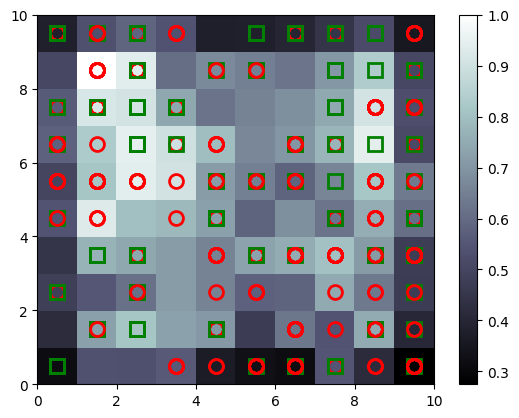

In [24]:
bone()
# identify fraudulent customer as the customer having
# maximum mean interneuron distance (MID)
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5, markers[Y[i]], markeredgecolor = colors[Y[i]], markerfacecolor = 'None', 
         markersize = 10, markeredgewidth = 2)

In [31]:
mappings = som.win_map(X)

In [47]:
frauds = np.concatenate((mappings[(1,8)], mappings[(3, 6)]), axis=0)

In [48]:
frauds_list = sc.inverse_transform(frauds)
frauds_list

array([[1.5651868e+07, 0.0000000e+00, 3.8750000e+01, 1.5000000e+00,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 7.6000000e+01, 1.0000000e+00],
       [1.5716082e+07, 0.0000000e+00, 2.2250000e+01, 1.2500000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 3.2500000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.8000000e+02, 1.0000000e+00],
       [1.5593959e+07, 0.0000000e+00, 2.1750000e+01, 1.7500000e+00,
        1.0000000e+00, 5.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 1.0000000e+00],
       [1.5651460e+07, 0.0000000e+00, 6.9500000e+01, 6.0000000e+00,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00,

In [49]:
fraudulent_customerID = [row[0] for row in frauds_list]
for i in fraudulent_customerID:
    print(i)

15651868.0
15716082.0
15593959.0
15651460.0
15592999.0
15752344.0
15611409.0
15792107.0
15636454.0
15608916.0
15567839.0
15646190.0
